In [1]:
import pandas as pd
%matplotlib inline

In [2]:
tips = pd.read_csv('tips.csv')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips['total_bill'].max()

50.81

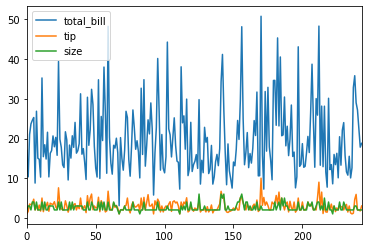

In [5]:
tips.plot()
# Основным методом, который предлагает Pandas для быстрого создания простейших графиков и диаграмм, является метод plot. 
# Примените этот метод к нашему датафрейму и посмотрите на результат:

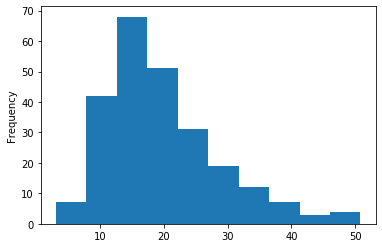

In [6]:
# Если применить метод plot не ко всему датафрейму, а только к одному столбцу, 
# а в качестве одного из параметров указать тип диаграммы (например, тип hist), то мы получим гистограмму распределения признака:
tips['total_bill'].plot(kind = 'hist')


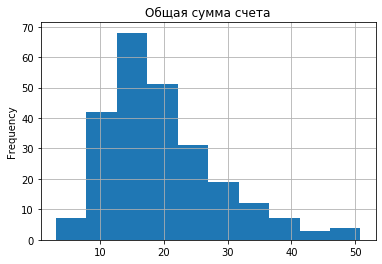

In [7]:
# grid добавит сетку, title - название
tips['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счета')

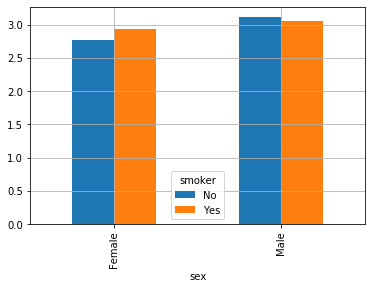

In [8]:
tips.pivot_table(index = 'sex', columns = 'smoker', values = 'tip').plot(kind = 'bar', grid= True) 


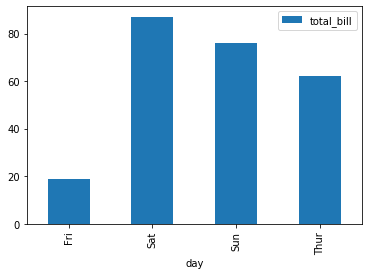

In [9]:
#Для работы с категориальными (нечисловыми) переменными с помощью метода hist датафрейм необходимо предварительно обработать. 
#Например, если мы хотим увидеть распределение посетителей по дням недели, нужно предварительно посчитать, 
#сколько заказов пришлось на каждый из дней недели. Сделать это можно с помощью метода value_counts(), 
#а уже к получившемуся датафрейму применить метод plot. Тип графика, который мы будем использовать в этом случае,
#— bar (столбчатая диаграмма). Чтобы все столбцы были одного цвета, введём параметр colormap со значением coolwarm: 

tips.groupby('day').agg({'total_bill':'count'}).plot(kind = 'bar')

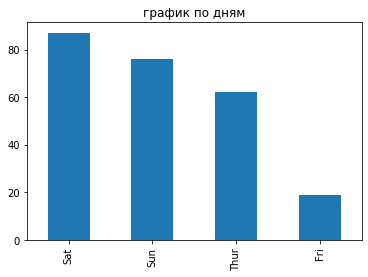

In [10]:
tips['day'].value_counts().plot(kind = 'bar', title = 'график по дням')

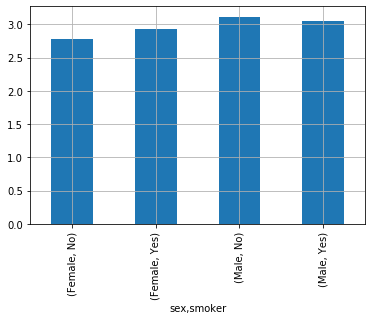

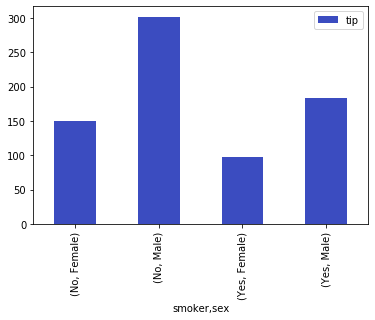

In [11]:
tips.groupby(by = ['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid= True) 
tips.groupby(['smoker','sex']).agg({'tip':'sum'}).plot(kind = 'bar', colormap = 'coolwarm')

### Отображение двух показателей на графике
Метод plot позволяет использовать параметр subplots, который принимает логические значения True или False. При установке значения True можно разместить несколько графиков в одной рабочей области:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11d0ec790>,
      dtype=object)

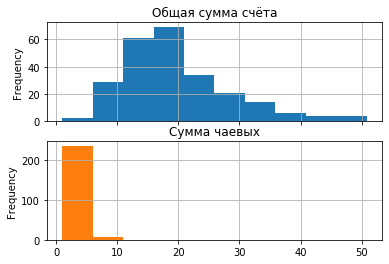

In [12]:
tips[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = False)

Такой вариант отображения графиков показывает, в каких пределах изменяются оба признака, но ничего не говорит о том, есть ли какая-то связь между суммой по счёту и суммой чаевых. Для получения такой информации мы можем построить график типа scatter plot:

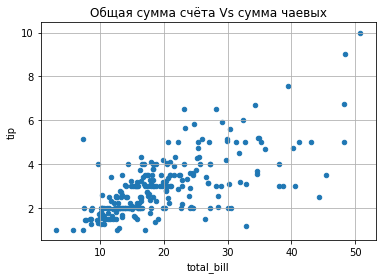

In [13]:
tips.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

На этом графике видна тенденция, что более щедрые чаевые обычно оставляют посетители, которые делают более дорогие заказы, а также видны исключения из правила.

Если нам нужно совместить на графике несколько качественных и количественных показателей, то датафрейм следует предварительно обработать. Например, если мы хотим отобразить средние значения суммы счёта и размера чаевых по дням недели, то потребуется такой код:

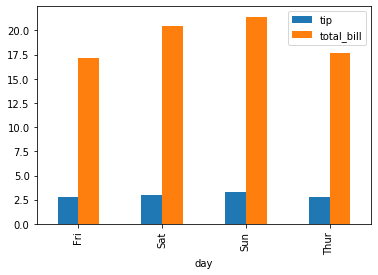

In [14]:
tips.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

Объектно-ориентированный подход к созданию графиков
Matplotlib — это библиотека Python, обладающая широкими возможностями для создания и отображения графической информации. В этом блоке мы рассмотрим основные приёмы работы с этой библиотекой на примере оформления графиков для датасета tips.csv. 

Импортируйте необходимые библиотеки, включая модуль pyplot библиотеки Matplotlib, который содержит необходимые функции и методы. Для корректного отображения графиков в ноутбуке вставьте команду %matplotlib inline. Загрузите файл tips.csv.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

Существует несколько подходов к созданию графиков в Matplotlib. Один из них — объектно-ориентированный подход, наиболее прозрачный и мощный по функциональности.

Процесс работы над графиком начинается с создания объекта, содержащего необходимую информацию и настройки. К этому объекту мы будем добавлять координатную плоскость и другие графические объекты. В первой строке кода создаётся объект с именем fig, к которому применяются все настройки. Во второй строке создается координатная плоскость (axes), которая начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает все отведенное место в области (ширина и высота равны 1).

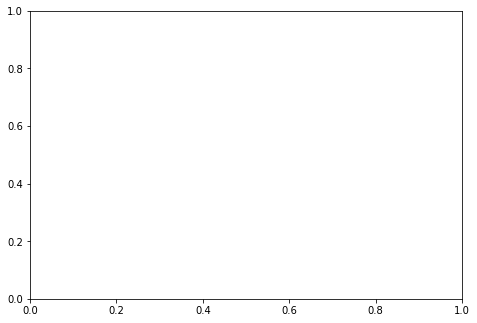

In [16]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

Теперь мы можем разместить в созданной нами координатной плоскости любую графическую информацию. Например, для построения гистограммы распределения признака «Общая сумма счёта» нам следует применить к axes метод hist:

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

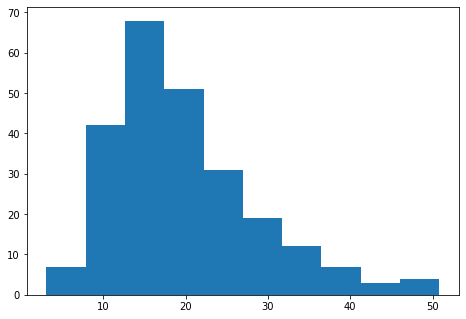

In [17]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(tips['total_bill'])

У метода hist можно менять цвет диаграммы (color) и увеличивать количество столбцов для демонстрации распределения (bins).К графику можно добавить заголовки:

axes.set_title — заголовок диаграммы;
axes.set_ylabel — заголовок для оси ординат;
axes.set_xlabel — заголовок для оси абсцисс.
Посмотрите полный список методов к объекту axes в официальной документации(https://matplotlib.org/api/axes_api.html?highlight=axes#module-matplotlib.axes)

Text(0.5, 0, 'Сумма заказа, USD')

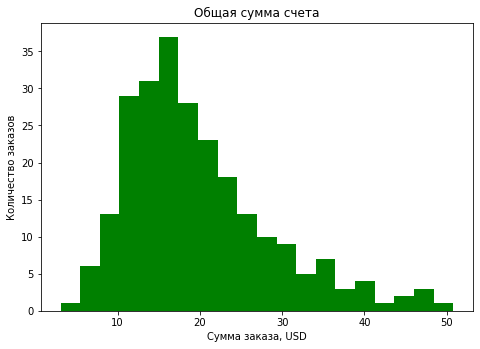

In [18]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(tips['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')


Для размещения на координатной плоскости графиков других видов, необходимо вызывать соответствующие методы применительно к объекту axes. Например, для создания scatter plot, отображающего связь между суммой счёта и размером чаевых, воспользуемся методом scatter:

Text(0, 0.5, 'Размер чаевых')

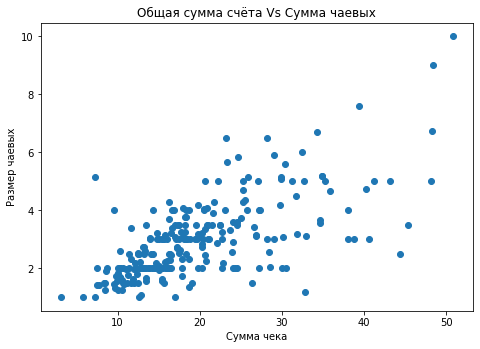

In [19]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = tips['total_bill'], y = tips['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

С помощью параметра marker можно настроить форму маркеров, используемых для отображения каждого индивидуального случая. Посмотрите другие варианты форм маркеров(https://matplotlib.org/api/markers_api.html#module-matplotlib.markers)

### Несколько систем координат
Мы можем размещать несколько систем координат на одном объекте, что позволит нам отображать вспомогательную информацию на основном графике. Для добавления второй системы координат необходимо повторно применить к объекту fig метод set_axes, указав новое имя для второй системы координат.

Первые два числовых параметра, указанных при создании систем координат, — это отступ снизу и слева, а следующие два — ширина и высота относительно ширины и высоты всего пространства (в долях единицы) для построения графика.

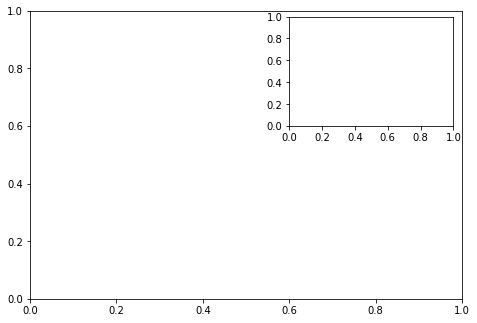

In [20]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])

В основную координатную плоскость разместим гистограмму распределения признака «Общая сумма счета», а в дополнительную — данные о максимальном и минимальном значении этого признака по дням недели. Для создания вспомогательного графика нужно предварительно обработать основной датафрейм и извлечь из него нужную информацию.

In [21]:
tips_per_day = tips.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()

In [22]:
# tips_per_day = tips.groupby('day').agg({'total_bill':['min','max']}).reset_index()

In [23]:
tips_per_day

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


Для размещения каждого графика применим соответствующий метод к объекту, представляющему нужную нам систему координат: 

к объекту main_axes применим метод hist;
для объекта insert_axes используем метод bar:

<BarContainer object of 4 artists>

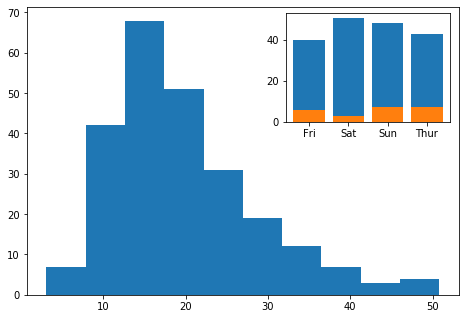

In [24]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(tips['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'])

# В коде используется новый для нас приём — для добавления в систему координат каждого типа столбцов мы отдельно 
# применяем метод bar, указывая разные значения параметра height.

Недостатком графика является то, что на вспомогательной диаграмме столбцы перекрывают друг друга, из-за чего появляется риск потерять часть информации. Для решения этой проблемы поработаем с настройками метода bar:

<BarContainer object of 4 artists>

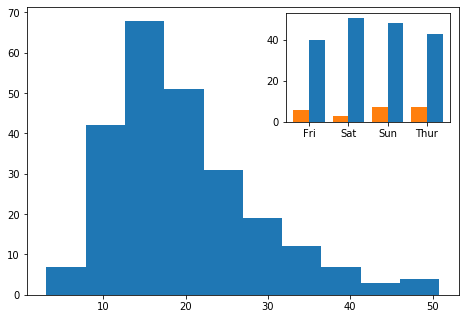

In [26]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(tips['total_bill']) #Параметр align указывает, следует ли размещать столбцы для отображения каждого значения в центре или необходимо сместить их к краю. С помощью параметра width мы задаем ширину столбца в долях единицы относительно ширины всего пространства, выделенного для данного столбца. Отрицательное значение ширины позволит нам сдвинуть столбцы, отображающие данный параметр, в левую сторону. Это работает, если в качестве параметра align используется 'edge':


insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
                width = 0.4, align = 'edge')
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
                width = -0.4, align = 'edge')

Параметр align указывает, следует ли размещать столбцы для отображения каждого значения в центре или необходимо сместить их к краю. С помощью параметра width мы задаем ширину столбца в долях единицы относительно ширины всего пространства, выделенного для данного столбца. Отрицательное значение ширины позволит нам сдвинуть столбцы, отображающие данный параметр, в левую сторону. Это работает, если в качестве параметра align используется 'edge':

### Легенда

Легенда
Если на графике отображаются данные из нескольких столбцов датафрейма, необходимо сопроводить график дополнительными пояснениями: какой цвет соответствует выводимой информации. Для этого добавим на график легенду при помощи метода legend к объекту axes. Для корректного отображения данных в легенде необходимо добавить параметр label. Место размещения легенды на координатной плоскости задаётся с помощью параметра loc:

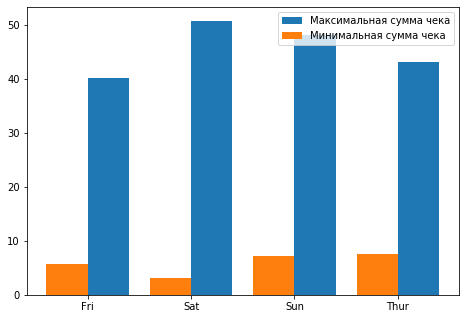

In [27]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
         width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
         width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)

Чтобы легенда не перекывала часть данных, увеличиваем максимальное значение оси ординат с помощью метода set_ylim к объекту axes:

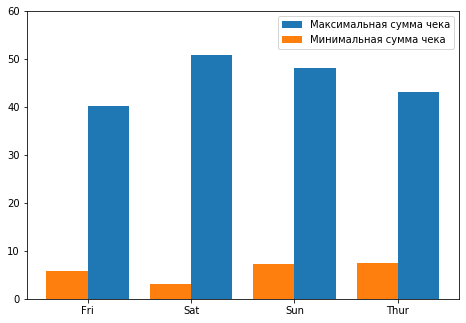

In [28]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], width = 0.4, align = 'edge', label = "Максимальная сумма чека")
axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], width = -0.4, align = 'edge', label = "Минимальная сумма чека")
axes.legend(loc = 1)

### Subplots
Разместить в одном пространстве несколько графиков можно и с помощью метода subplots. В параметрах фигуры необходимо указать количество строк и столбцов, в которых будут размещаться графики. При желании можно задать размер фигуры в дюймах (ширина*высота):

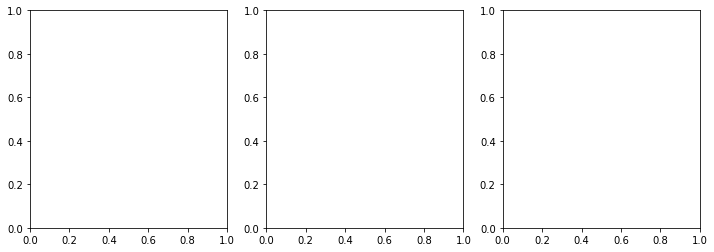

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

После выполнения кода переменная axes содержит список, состоящий из трех объектов. Обращаться к элементам списка можно по индексам (от 0 до 2):

Text(0.5, 1.0, 'Общая сумма счёта Vs Cумма чаевых')

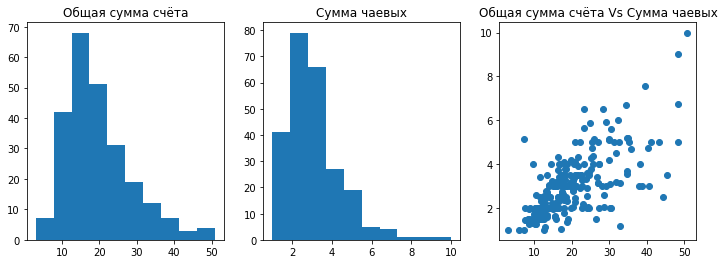

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].hist(tips['total_bill'])
axes[0].set_title('Общая сумма счёта')

axes[1].hist(tips['tip'])
axes[1].set_title('Сумма чаевых')

axes[2].scatter(x = tips['total_bill'], y = tips['tip'], marker = 'o')
axes[2].set_title('Общая сумма счёта Vs Cумма чаевых')